# Load Animal Density Data

In this notebook, we will look into how to load and plot marine mammal density data, e.g., from the Duke Marine Lab habitat-based model. And we'll also look at computing zonal statistics

https://seamap.env.duke.edu/models/Duke/GOM/

In [67]:
import zipfile
import glob
import rasterio
from rasterstats import zonal_stats
import matplotlib.pylab as plt
import numpy as np
import geopandas as gpd


## Download and unzip the data

First, go to the website above and downloaded each of the species density data zip files into the data/roberts/ folder.

In [64]:
# Commenting this out because once it's loaded I don't want to do it again every time. Uncomment as needed.

# zip_file_list = glob.glob(r'data/roberts/*.zip')

# for file in zip_file_list:
#     zip_ref = zipfile.ZipFile(file)
#     zip_ref.extractall('data/roberts/unzipped')

Now, try loading one of the raster datafiles using rasterio.

(-3.4e+38,)

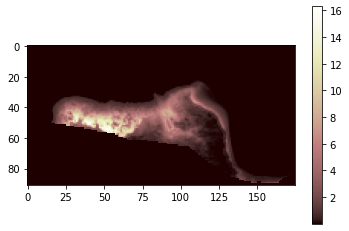

In [87]:
# Find all the density image files
density_file_list = glob.glob(r'data/roberts/unzipped/*abundance.img')

# load raster data
rst = rasterio.open(density_file_list[0])
rst_array = rst.read(1)

# Plot the raster data
plt.imshow(rst.read(1), cmap='pink', vmin=1e-5)
plt.colorbar()

# rst.nodatavals

## Load polygon data

We want to calculate zonal statistics within a polygon, so let's retrieve polygon data from the GoM protraction areas. 

In [131]:
file_name = r'data/protrac/protrac.shp'
gdf = gpd.read_file(file_name).set_index("PROT_NAME")

# Reproject the geodataframe to the same coordinates as the raster that was loaded above
gdf = gdf.to_crs(crs=rst.crs.data)

# Load a specific area - this will be a shapely polygon
poly = gdf.iloc[0]['geometry']


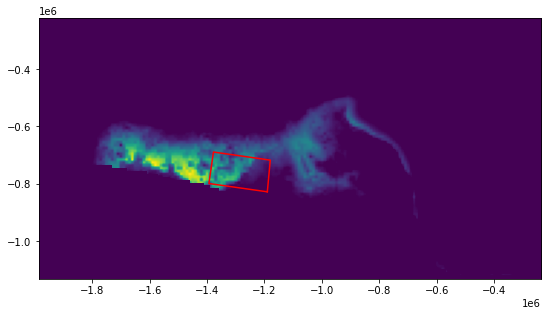

In [192]:
protrac_index = 38
density_file_number = 0

fig,ax = plt.subplots(1,1,figsize=(9,9))
show((rst, 1), ax=ax, vmin=1.6)
x,y = gdf.iloc[protrac_index]['geometry'].exterior.xy
ax.plot(x,y,'r')


In [195]:
species_name = density_file_list[density_file_number].split('/')[-1].split('_abundance.img')[0][4:]

mean_density = zonal_stats(gdf.iloc[protrac_index].geometry, density_file_list[density_file_number], stats=['mean'], nodata=rst.nodatavals[0])
print('{:.2f}'.format(mean_density[0].get('mean')) + ' ' + species_name +'s per square km')

5.48 Clymene_dolphins per square km
